In [3]:
# Import libraries
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model
from matplotlib import pyplot as plt

In [4]:
# Set the base directory
base_dir = "/content/drive/MyDrive/DataSet"

# Define train and test directories
train_dir = os.path.join(base_dir, "train_v2/")
test_dir = os.path.join(base_dir, "test_v2/")

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
def dice_coef(y_true, y_pred, smooth=1):
    # Dice coefficient calculation
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [7]:
# Load the pre-trained model
model = load_model("/content/drive/MyDrive/DataSet/model_full.h5", custom_objects={"dice_coef": dice_coef})

In [8]:
# Image scaling factor
IMG_SCALING = (3, 3)

def prediction(test_dir, img, model):
    # Load and preprocess the test image
    rgb_path = os.path.join(test_dir, img)
    img = cv2.imread(rgb_path)[::IMG_SCALING[0], ::IMG_SCALING[1]]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
    img = tf.expand_dims(img, axis=0)

    # Make predictions using the model
    pred = np.squeeze(model.predict(img), axis=0)
    return cv2.imread(rgb_path), pred

1/1 [==============================] - 0s 164ms/step


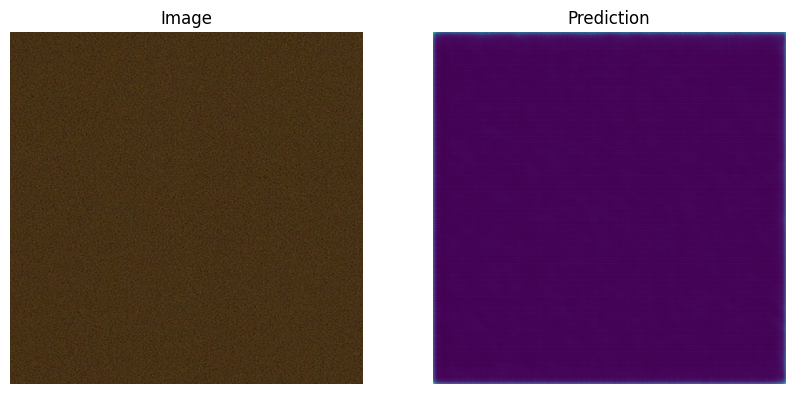

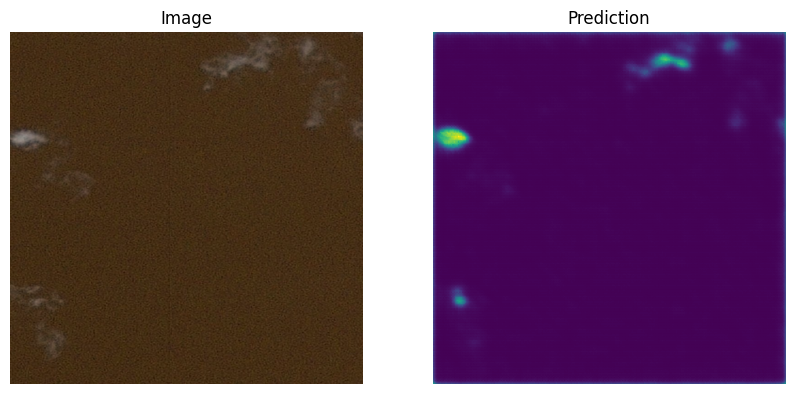

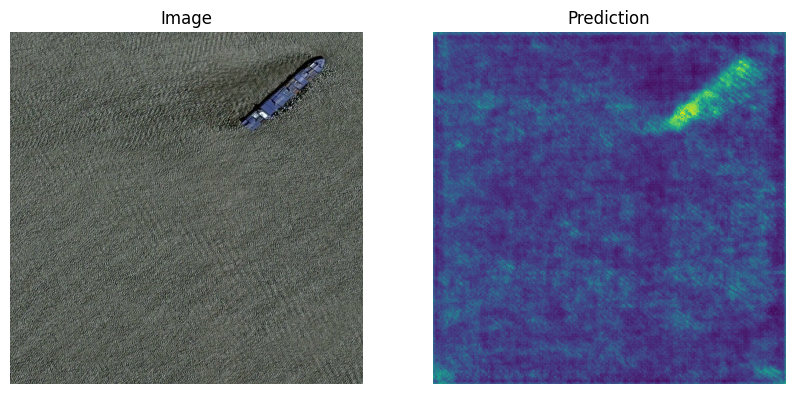

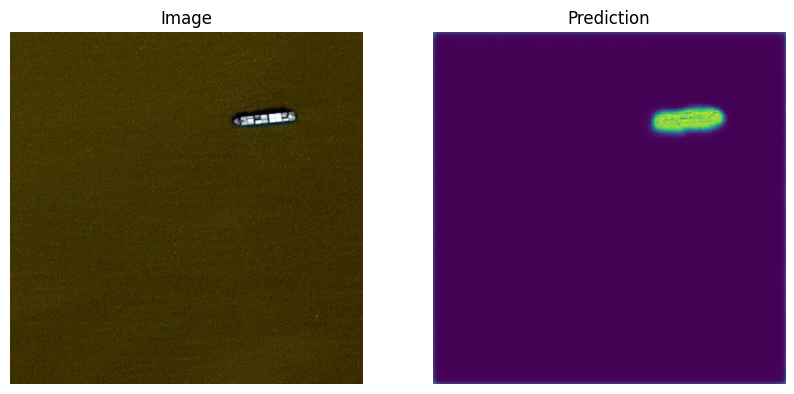

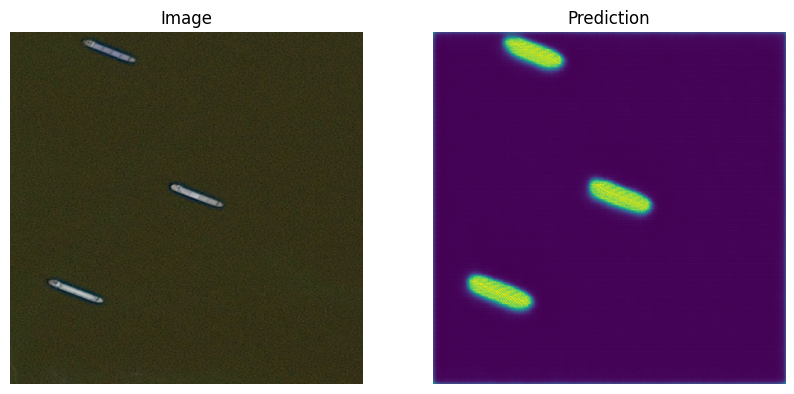

In [9]:
test_imgs = ["01cafb896.jpg", "016e4e530.jpg", "009c7f8ec.jpg", "00c3db267.jpg", "00dc34840.jpg"]

%matplotlib inline

# Display images and predictions
for i in range(len(test_imgs)):
    img, pred = prediction(test_dir, test_imgs[i], model)
    
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(1, 2, 1)
    
    plt.imshow(img)
    plt.axis("off")
    plt.title("Image")
    
    fig.add_subplot(1, 2, 2)
    
    plt.imshow(pred, interpolation=None)
    plt.axis("off")
    plt.title("Prediction")